# Loading data

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\zzg\Desktop\data.csv', sep = ',')

FileNotFoundError: File b'C:\\Users\\zzg\\Desktop\\data.csv' does not exist

In [ ]:
from sklearn import datasets
import numpy as np
y = df.iloc[:, 11]
y.head()

In [ ]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
X.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, random_state=42)
lr.fit(X_train, y_train)



LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1, 
                                           C=100.0))
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.4, 0.9])
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 0.9])
plt.tight_layout()
plt.show()

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

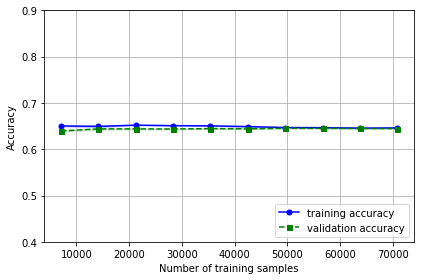

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 0.9])
plt.tight_layout()
plt.show()

# Evaluation

In [30]:
from sklearn.metrics import accuracy_score
y_tree_pred = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_tree_pred))


Accuracy: 0.64


In [33]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_tree_pred)
print(confmat)


[[21676   104]
 [11880    80]]


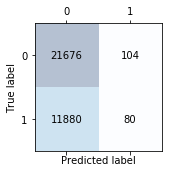

In [34]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

# Applying bagging to classify samples

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.543


# Which hero to choose

For given number, for example [9,78,65,43,23],[4,8,76,122,i], I need to find the i to make the blue team win rate largest, use grammar:

In [35]:
df1 = pd.read_csv(r'C:\Users\zzg\Desktop\test data.csv', sep = ',')

In [36]:
df1

,red team 1,red team 2,red team 3,red team 4,red team 5,blue team 1,blue team 2,blue team 3,blue team 4,blue team 5
0,9,78,65,43,23,4,8,76,122,1
1,9,78,65,43,23,4,8,76,122,2
2,9,78,65,43,23,4,8,76,122,3
3,9,78,65,43,23,4,8,76,122,4
4,9,78,65,43,23,4,8,76,122,5
5,9,78,65,43,23,4,8,76,122,6
6,9,78,65,43,23,4,8,76,122,7
7,9,78,65,43,23,4,8,76,122,8
8,9,78,65,43,23,4,8,76,122,9
9,9,78,65,43,23,4,8,76,122,10


In [37]:
lr.predict_proba(df1)

array([[ 0.64576532,  0.35423468],
       [ 0.64576126,  0.35423874],
       [ 0.6457572 ,  0.3542428 ],
       [ 0.64575313,  0.35424687],
       [ 0.64574907,  0.35425093],
       [ 0.64574501,  0.35425499],
       [ 0.64574095,  0.35425905],
       [ 0.64573688,  0.35426312],
       [ 0.64573282,  0.35426718],
       [ 0.64572876,  0.35427124],
       [ 0.64572469,  0.35427531],
       [ 0.64572063,  0.35427937],
       [ 0.64571657,  0.35428343],
       [ 0.64571251,  0.35428749],
       [ 0.64570844,  0.35429156],
       [ 0.64570438,  0.35429562],
       [ 0.64570032,  0.35429968],
       [ 0.64569625,  0.35430375],
       [ 0.64569219,  0.35430781],
       [ 0.64568813,  0.35431187],
       [ 0.64568406,  0.35431594],
       [ 0.64568   ,  0.35432   ],
       [ 0.64567594,  0.35432406],
       [ 0.64567188,  0.35432812],
       [ 0.64566781,  0.35433219],
       [ 0.64566375,  0.35433625],
       [ 0.64565969,  0.35434031],
       [ 0.64565562,  0.35434438],
       [ 0.64565156,

we find that choosing one has the highest win rate, so we should choose Jax